In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [8]:
PATH = "dual_sen_sample_1.csv"

In [9]:
def moving_mean(time, data, lag=5):
    X = []
    y = []
    y_std = []
    for i in range(int(len(data)/lag)):
        X.append(time[(i*lag+lag)])
        y.append(np.mean(data[(i*lag):(i*lag+lag)]))
        y_std.append(np.std(data[(i*lag):(i*lag+lag)]))
        
    return X, y, y_std

In [10]:
def ds_make(df,y_col,win=20):    
    x, y = [], []
    for i in range(int(len(df)-win-1)):
        a = df.loc[i:(i+win)-1]
        x.append(a)
        y.append(df.loc[i+win])
    return np.array(x), np.array(y)

In [11]:
df = pd.read_csv(PATH,parse_dates=['datetime','date'])

df.drop(['date','time','r_sen_1','s_sen_1','s_sen_2'],axis=1,inplace=True)
# df["mvg20_sen_2"] = df.loc[:,"r_sen_2"].rolling(window=20).mean()
# df["mvg20_sen_2"] = df["mvg20_sen_2"].round()
x, y, y_err = moving_mean(df['datetime'],df["r_sen_2"], 20)
df.loc[df['datetime'].isin(x),'avg20_sen_2'] = y
df.loc[df['datetime'].isin(x),'std20_sen_2'] = y_err
df.dropna(inplace=True)
df.head()

,datetime,r_sen_2,avg20_sen_2,std20_sen_2
20,2020-08-12 15:12:11,630,630.0,0.0
40,2020-08-12 15:32:11,630,630.0,0.0
60,2020-08-12 15:52:11,630,630.0,0.0
80,2020-08-12 16:12:11,630,630.0,0.0
100,2020-08-12 16:32:11,630,630.0,0.0


In [12]:
import os
os.getcwd()

'C:\\Users\\gteel\\MoistBot'

In [13]:
df_w = df.loc[df['std20_sen_2'] > 15]
df_t = pd.DataFrame(data={'datetime':pd.to_datetime("2020-08-07 13:40:31"),'r_sen_2':np.average(df_w['r_sen_2']), 'avg20_sen_2':np.average(df_w['avg20_sen_2']),'std20_sen_2':np.average(df_w['std20_sen_2'])},index=[0])
df_t = df_t.append(df_w)
df_t.sort_values(['datetime'],ascending=False,inplace=True)


for r_i, r_d in df.iterrows():
    for idx, row in df_t.iterrows():
        if r_d.datetime >= row.datetime:
            df.loc[r_i,'last_water'] = r_d.datetime - row.datetime
            break
        else:
            next

df['dow'] = df.datetime.dt.dayofweek
df.reset_index(inplace=True)
df.index = df.datetime
df.drop("datetime",axis=1,inplace=True)
df.dropna(inplace=True)
df_w

,datetime,r_sen_2,avg20_sen_2,std20_sen_2
5980,2020-08-16 18:28:31,428,573.70,98.068395
21540,2020-08-27 13:37:31,498,466.15,26.439128
35740,2020-09-06 10:11:53,425,469.40,93.473205
47400,2020-09-14 12:23:49,418,501.60,117.408432


C:\Users\gteel\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


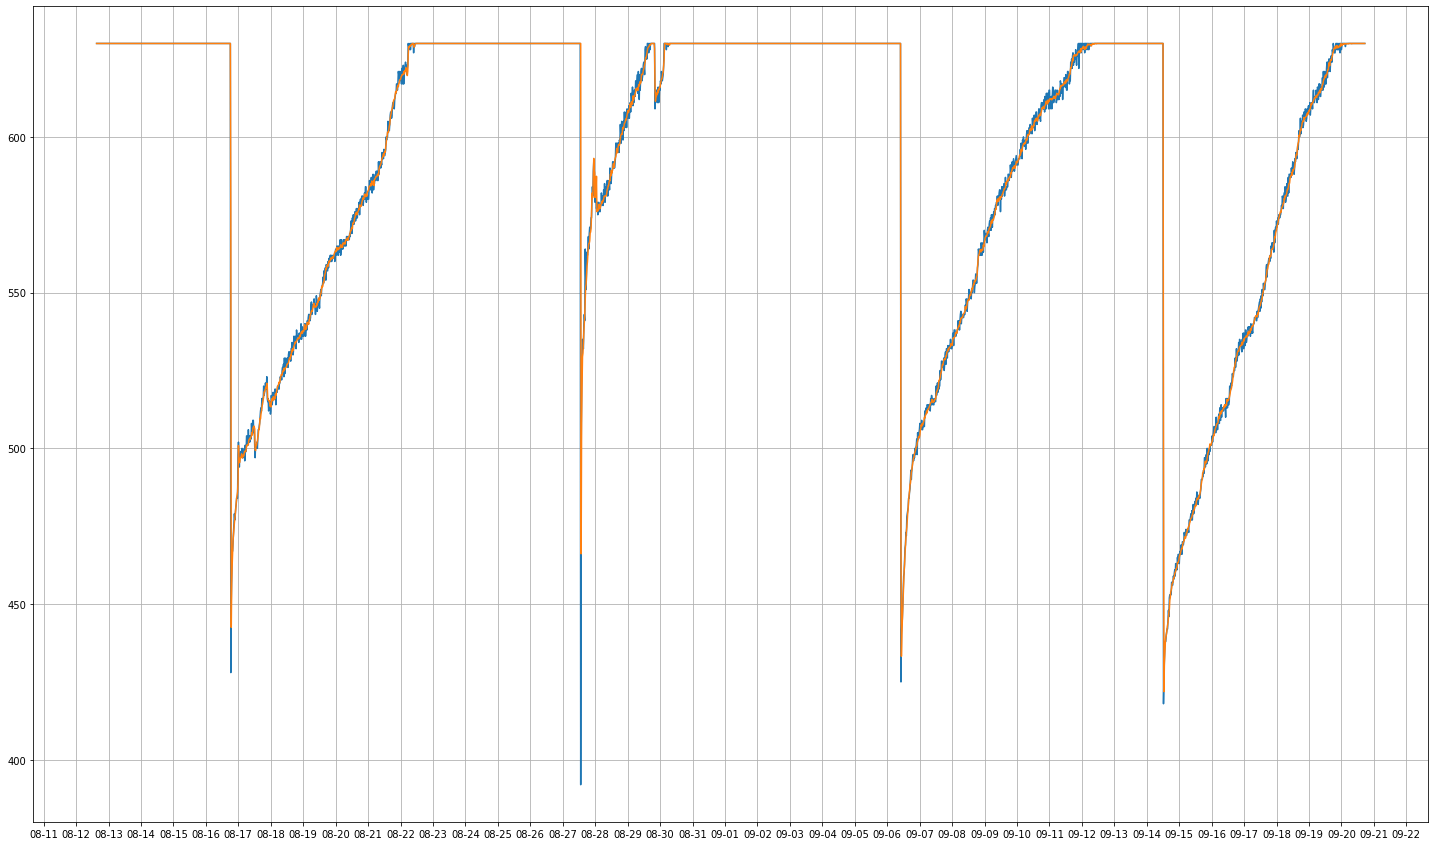

In [14]:
df_ts = df.copy()

fig, ax = plt.subplots(figsize=[25,15])
ax.grid(True)
ax.plot(df_ts.loc[:,'r_sen_2'],label='data')
ax.plot(df_ts.loc[:,'avg20_sen_2'],label='avgd')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.show()

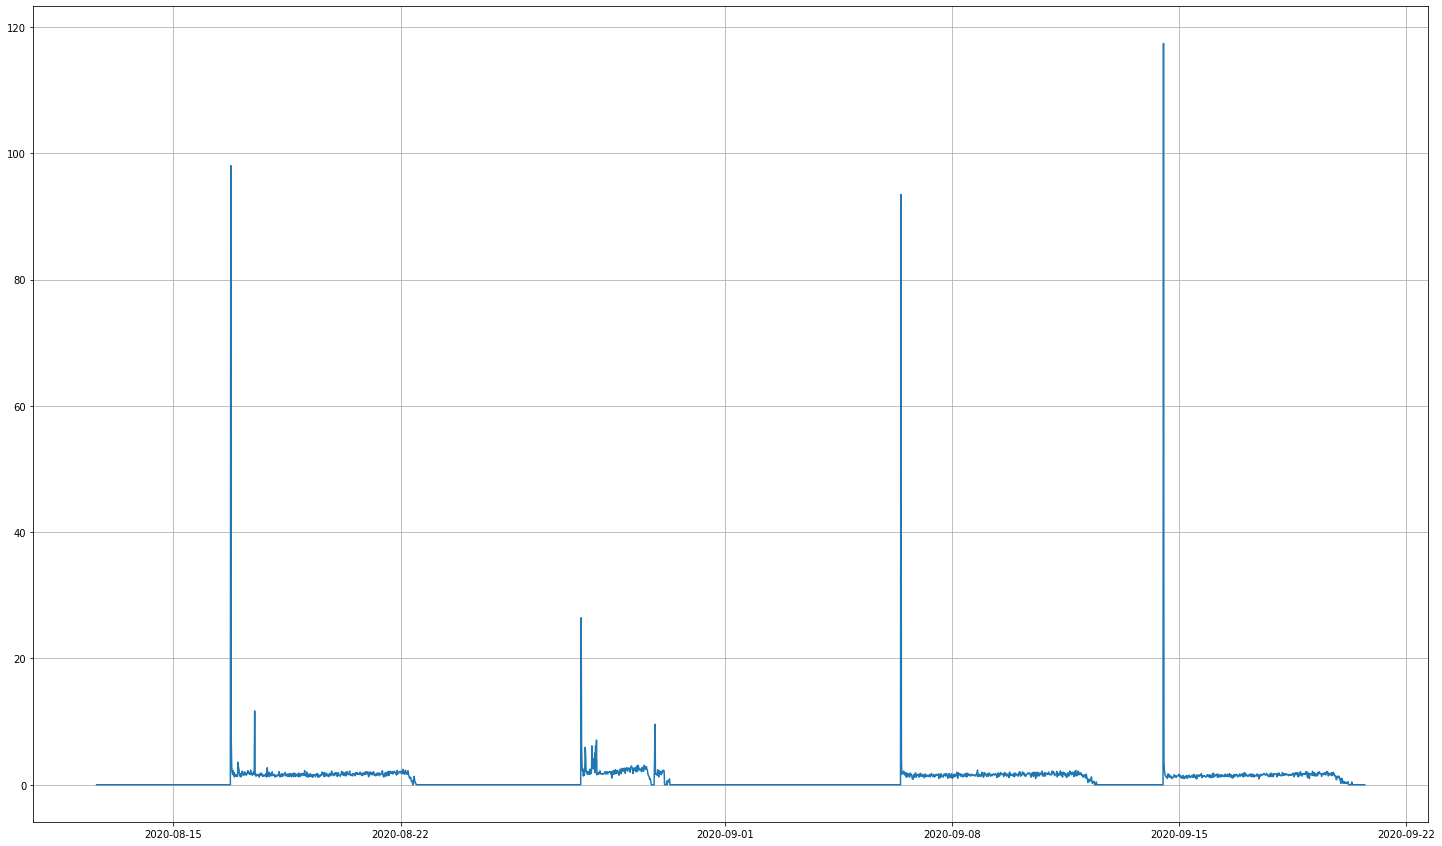

In [15]:
fig, ax = plt.subplots(figsize=[25,15])
ax.grid(True)
ax.plot(df_ts['std20_sen_2'])
plt.show()

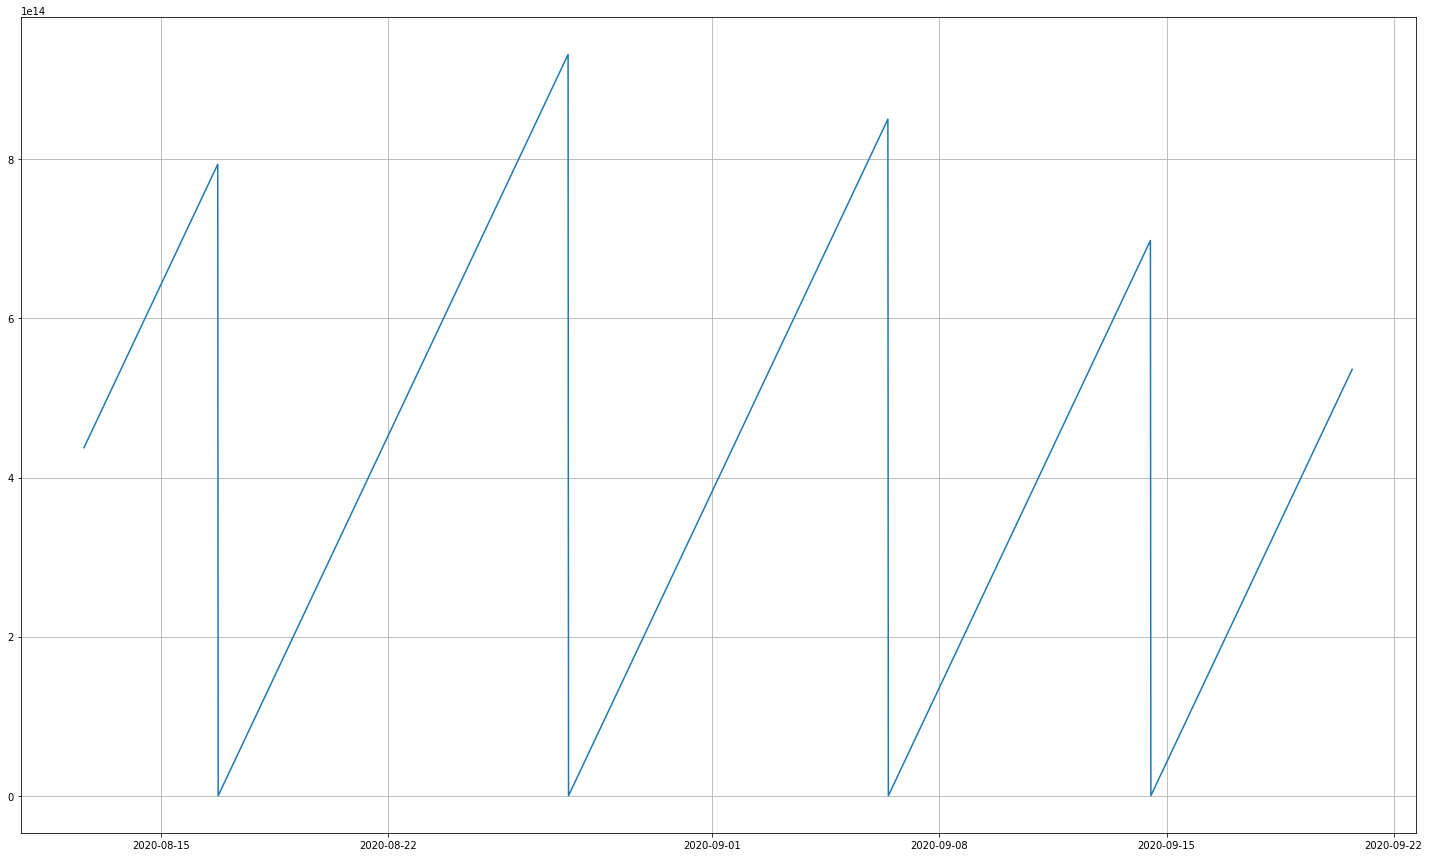

In [16]:
fig, ax = plt.subplots(figsize=[25,15])
ax.grid(True)
ax.plot(df_ts['last_water'])
plt.show()

In [17]:
df.head()

,index,r_sen_2,avg20_sen_2,std20_sen_2,last_water,dow
datetime,,,,,,
2020-08-12 15:12:11,20,630,630.0,0.0,5 days 01:31:40,2
2020-08-12 15:32:11,40,630,630.0,0.0,5 days 01:51:40,2
2020-08-12 15:52:11,60,630,630.0,0.0,5 days 02:11:40,2
2020-08-12 16:12:11,80,630,630.0,0.0,5 days 02:31:40,2
2020-08-12 16:32:11,100,630,630.0,0.0,5 days 02:51:40,2


In [18]:
df_d = df.reset_index()
df_d.drop('index',axis=1,inplace=True)
x, y = ds_make(df_d,"r_sen_2")

ValueError: cannot copy sequence with size 20 to array axis with dimension 6

In [ ]:
x[0]

In [30]:
y[0]

array([Timestamp('2020-08-12 21:52:11'), 630, 630.0, 0.0,
       Timedelta('5 days 08:11:40'), 2], dtype=object)

Reference


https://towardsdatascience.com/how-to-use-deep-learning-for-time-series-forecasting-3f8a399cf205